<a href="https://colab.research.google.com/github/srz11d/Predictive-microbial-insights-with-ML/blob/main/Microbiome_with_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prior exposure of microbial communities to seawater reduces resilience but increases compositional and functional resistance to flooding events**

This project describes the process to create a Random Forest analysis for taxonomic classification and the use of Linear Discriminant Analysis Effect Size (LEfSe) to identify features (ASVs) that are differentially abundant across the samples


In [18]:
#Random Forest for Taxonomic Classification
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
import os
print(os.getcwd())

/content


In [8]:
# Mount Google Drive
#Make sure to run the cell that mounts Google Drive first, and then navigate to the directory where your file is located
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to where your file is located
%cd /content/drive/MyDrive/Documents/Postdoc/Southport/

import pandas as pd

# Load the Excel file
df = pd.read_excel('Main_data.xlsx', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Documents/Postdoc/Southport


In [11]:
df.head()

,p__Proteobacteria,p__Bacteroidetes,p__Planctomycetes,p__Acidobacteria,p__Chloroflexi,p__Firmicutes,Xylopyranoside,Glucopyranoside,sulphate
Samples,,,,,,,,,
0PAR,37.920621,18.464193,18.032787,4.400345,12.597066,85.313889,36.8,103.2,5.6
0PBR,13.196167,12.916806,2.306682,6.852442,5.204213,1.782322,36.8,144.8,7.2
0PCR,15.009940,15.357853,20.949304,35.089463,1.068588,43.548106,35.2,99.2,5.6
1PAR,34.981569,23.973560,11.185967,8.402186,6.902250,82.528162,13.6,100.8,50.4
1PBR,15.164860,10.838325,6.238411,6.709100,0.367874,1.024580,14.8,172.0,129.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0PAR to 192LCR
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   p__Proteobacteria  36 non-null     float64
 1   p__Bacteroidetes   36 non-null     float64
 2   p__Planctomycetes  36 non-null     float64
 3   p__Acidobacteria   36 non-null     float64
 4   p__Chloroflexi     36 non-null     float64
 5   p__Firmicutes      36 non-null     float64
 6   Xylopyranoside     36 non-null     float64
 7   Glucopyranoside    36 non-null     float64
 8   sulphate           36 non-null     float64
dtypes: float64(9)
memory usage: 3.9+ KB


In [13]:
#Let's check for null values
df.isnull().any()

p__Proteobacteria    False
p__Bacteroidetes     False
p__Planctomycetes    False
p__Acidobacteria     False
p__Chloroflexi       False
p__Firmicutes        False
Xylopyranoside       False
Glucopyranoside      False
sulphate             False
dtype: bool

## Model building

In [14]:
#Create the model with the assigned values
X = df[['Xylopyranoside', 'Glucopyranoside', 'sulphate']]
y = df['p__Proteobacteria']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 373.29
R-squared: -3.36


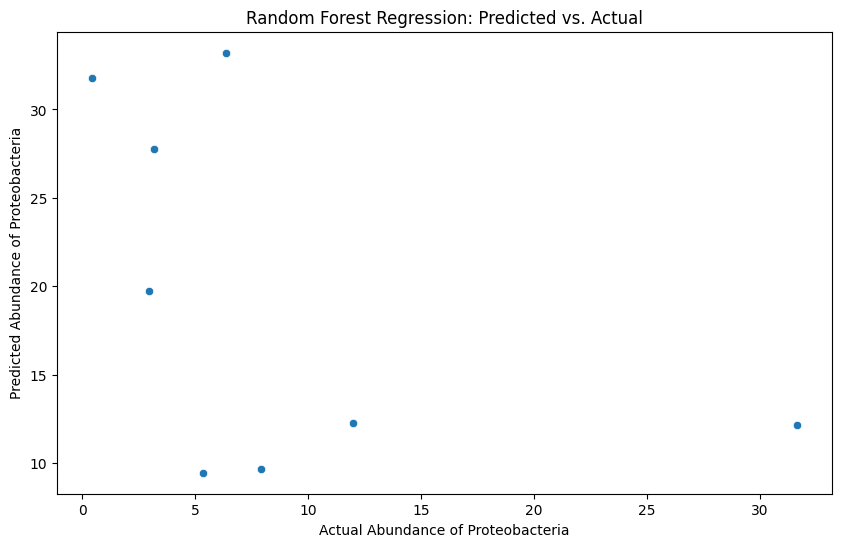

In [23]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Abundance of Proteobacteria')
plt.ylabel('Predicted Abundance of Proteobacteria')
plt.title('Random Forest Regression: Predicted vs. Actual')
plt.show()

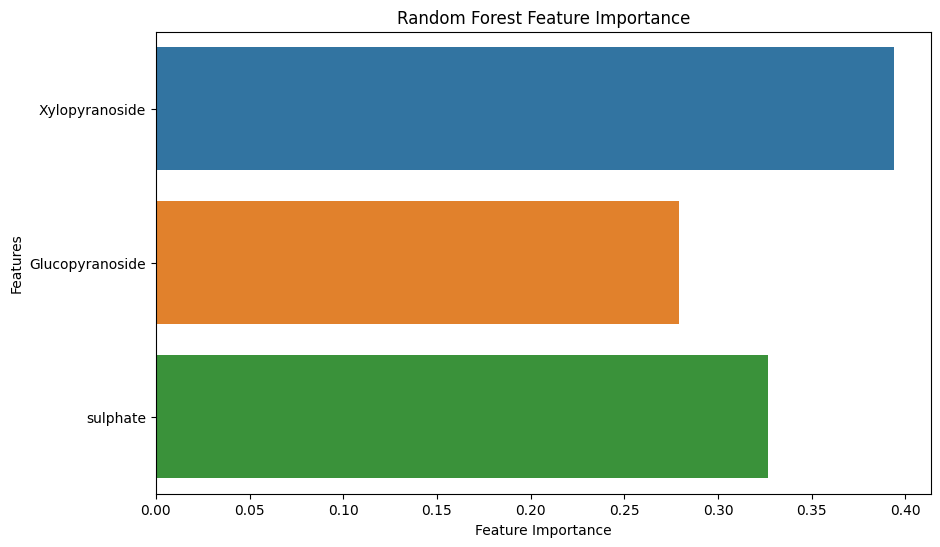

In [24]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

### Let's focus on just one enzyme

In [25]:
#Create the model with the assigned values
X = df[['Xylopyranoside']]
y = df['p__Proteobacteria']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 283.57
R-squared: -2.31


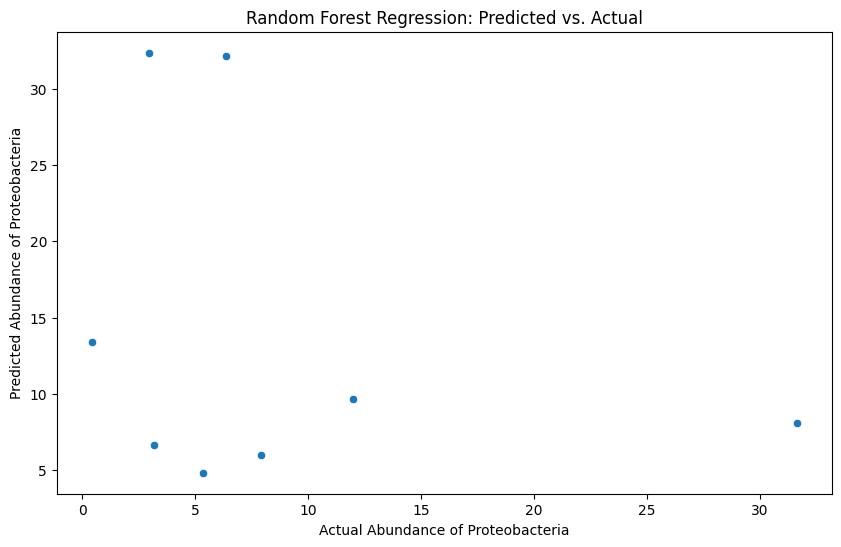

In [31]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Abundance of Proteobacteria')
plt.ylabel('Predicted Abundance of Proteobacteria')
plt.title('Random Forest Regression: Predicted vs. Actual')
plt.show()

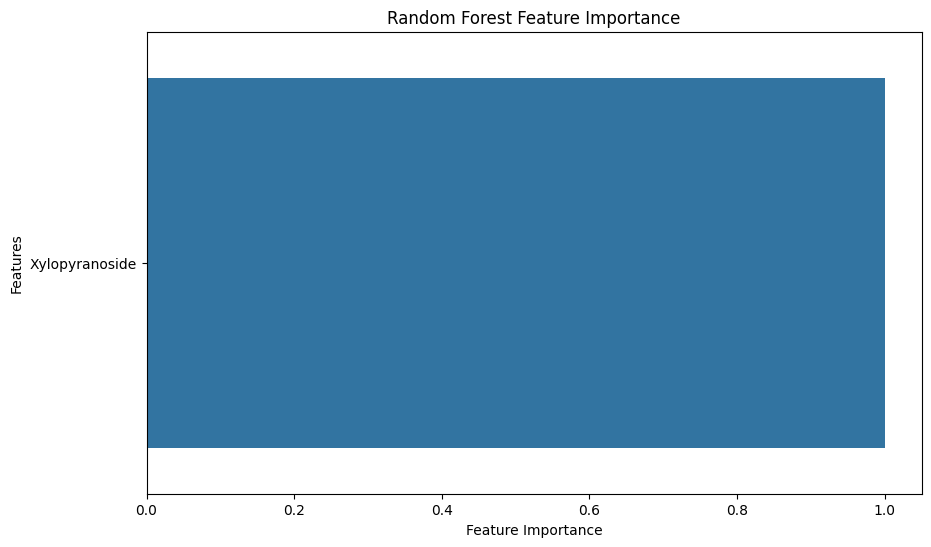

In [32]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

In [34]:
# Example of adjusting hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [35]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 234.23
R-squared: -1.73


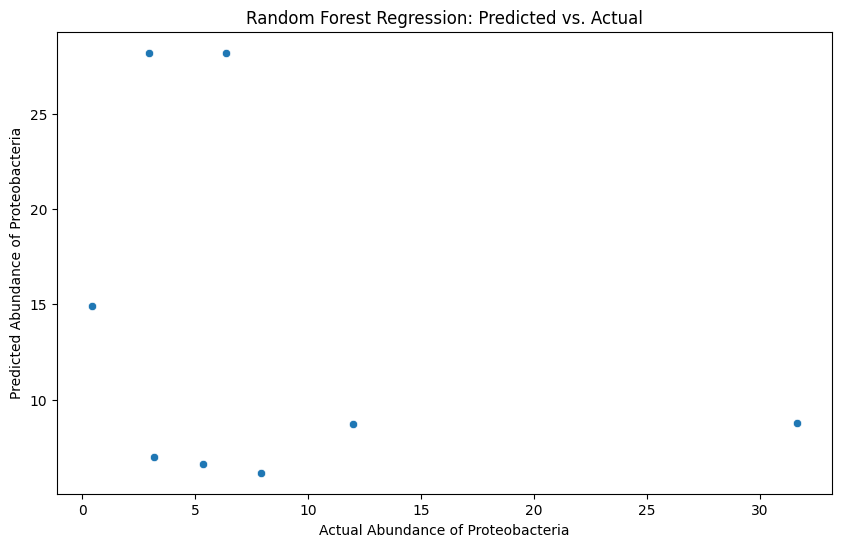

In [38]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Abundance of Proteobacteria')
plt.ylabel('Predicted Abundance of Proteobacteria')
plt.title('Random Forest Regression: Predicted vs. Actual')
plt.show()